In [3]:
# %pip install pandas matplotlib seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Use a raw string (r"...") or replace backslashes with forward slashes
df = pd.read_csv(r"C:\Users\hanag_wdy1xo1\OneDrive\Documentos\archive\hospital_charges_clean.csv")

# Quick check
print("✅ Data loaded successfully!")
print(df.shape)
df.head()

✅ Data loaded successfully!
(163065, 15)


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_total_payments_clean,average_covered_charges_clean,average_medicare_payments_clean
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"$32,963.07","$5,777.24","$4,763.73",5777,32963,4763
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,"$15,131.85","$5,787.57","$4,976.71",5787,15131,4976
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,"$37,560.37","$5,434.95","$4,453.79",5434,37560,4453
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,"$13,998.28","$5,417.56","$4,129.16",5417,13998,4129
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,"$31,633.27","$5,658.33","$4,851.44",5658,31633,4851


C:\Users\hanag_wdy1xo1\AppData\Local\Temp\ipykernel_8648\1740578817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg.values, palette="coolwarm")


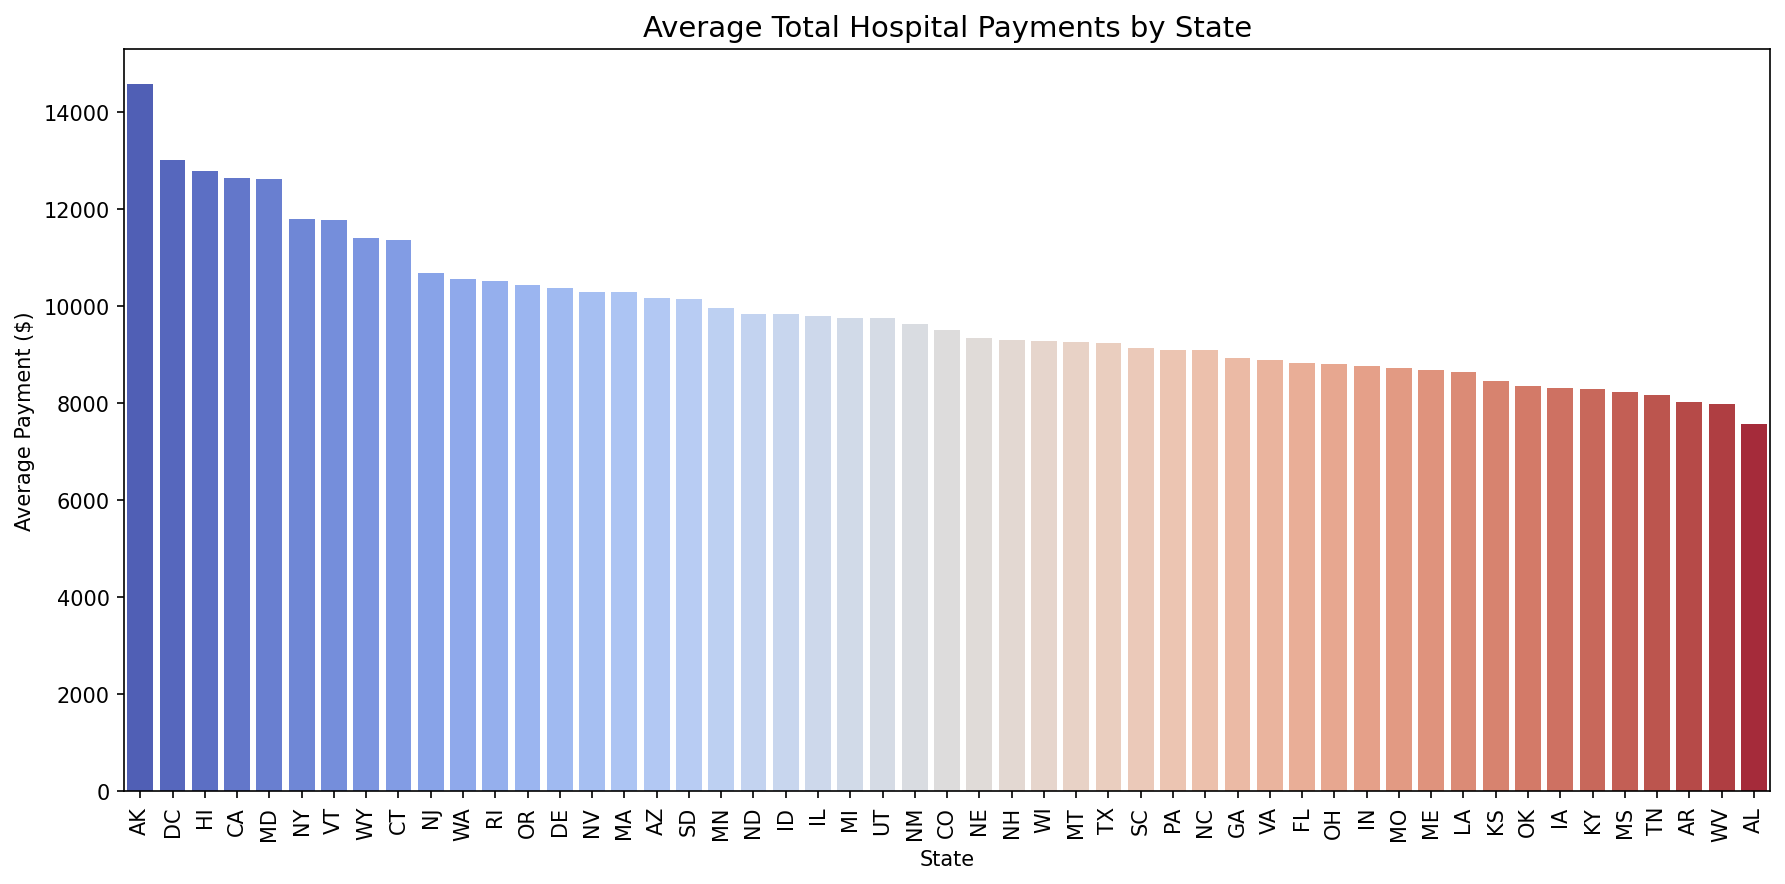

In [22]:
plt.figure(figsize=(12,6))
state_avg = (df.groupby("provider_state")["average_total_payments_clean"].mean().sort_values(ascending=False))
sns.barplot(x=state_avg.index, y=state_avg.values, palette="coolwarm")
plt.title("Average Total Hospital Payments by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Average Payment ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

States such as California, Texas, and New York show higher average hospital payments.
This may reflect regional cost variations, case complexity, or healthcare system differences.

C:\Users\hanag_wdy1xo1\AppData\Local\Temp\ipykernel_8648\2316855650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drg.index, x=top_drg.values, palette="mako")


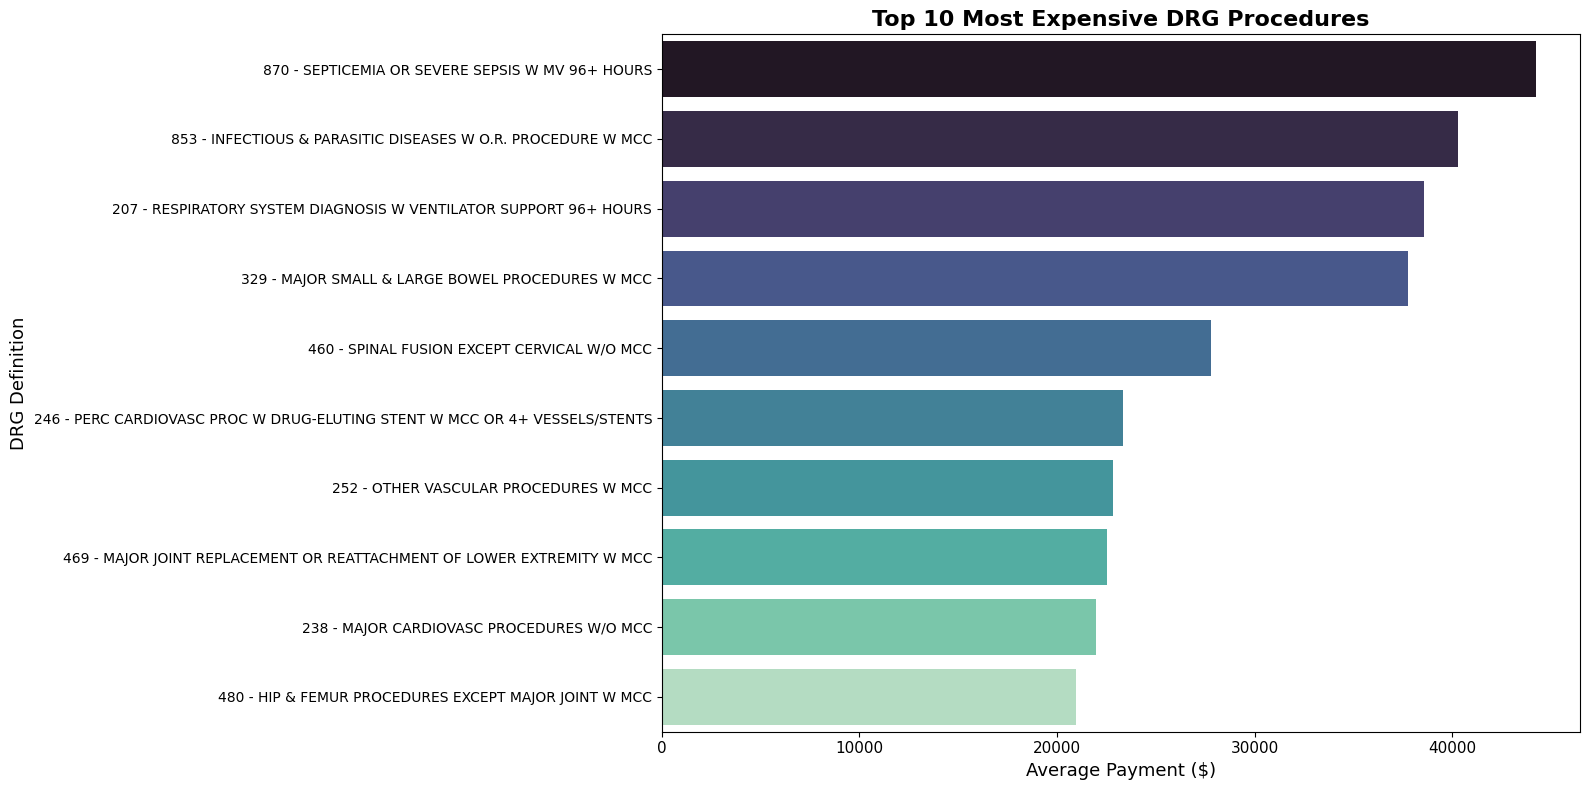

In [13]:
top_drg = (df.groupby("drg_definition")["average_total_payments_clean"].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(16,8))
sns.barplot(y=top_drg.index, x=top_drg.values, palette="mako")
plt.title("Top 10 Most Expensive DRG Procedures", fontsize=16, weight="bold")
plt.xlabel("Average Payment ($)", fontsize=13)
plt.ylabel("DRG Definition", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

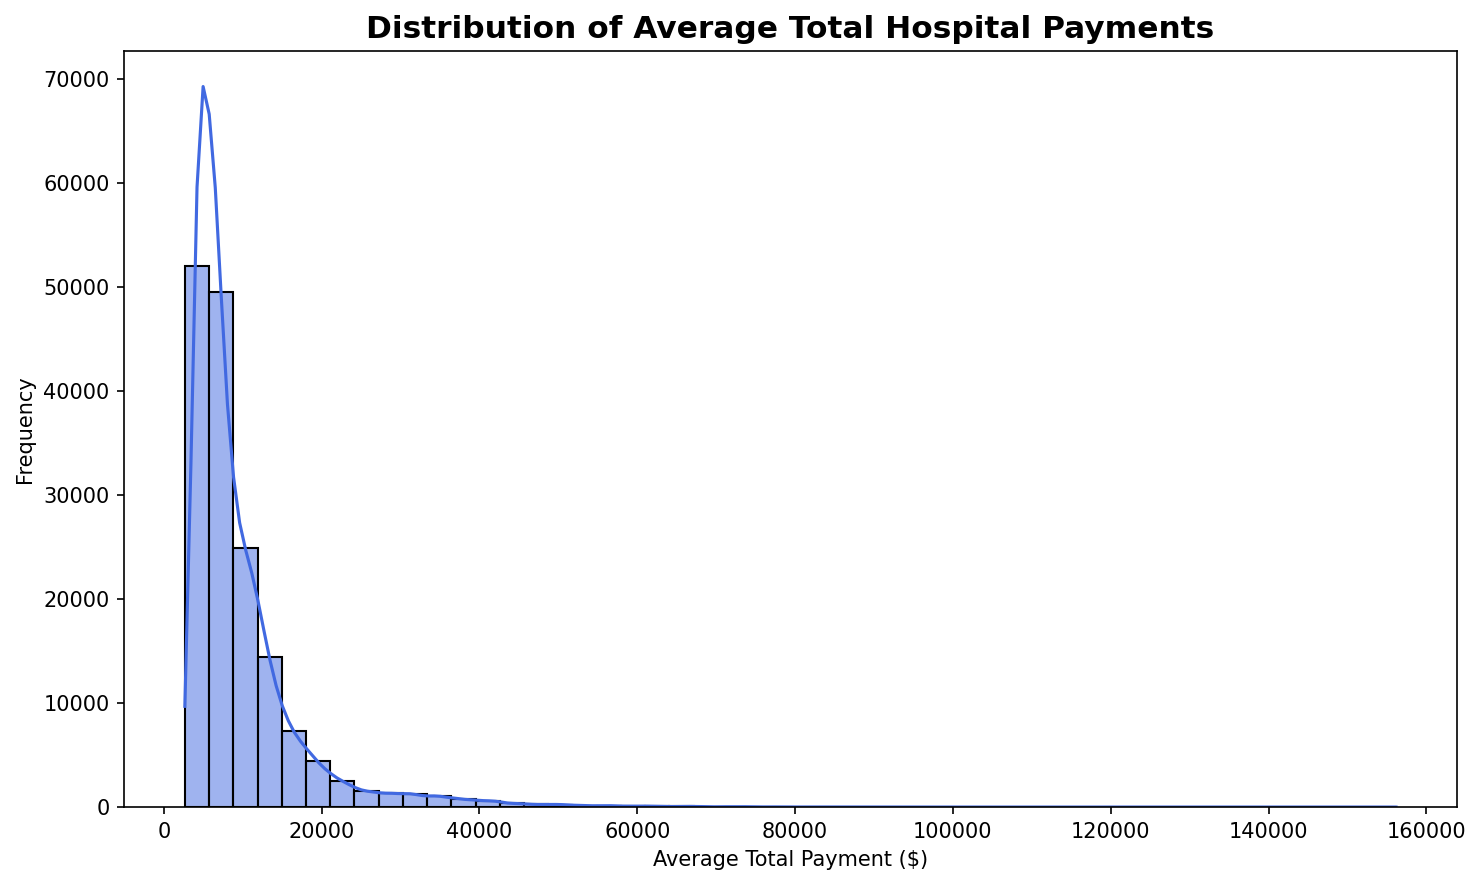

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df["average_total_payments_clean"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Average Total Hospital Payments", fontsize=15, weight="bold")
plt.xlabel("Average Total Payment ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

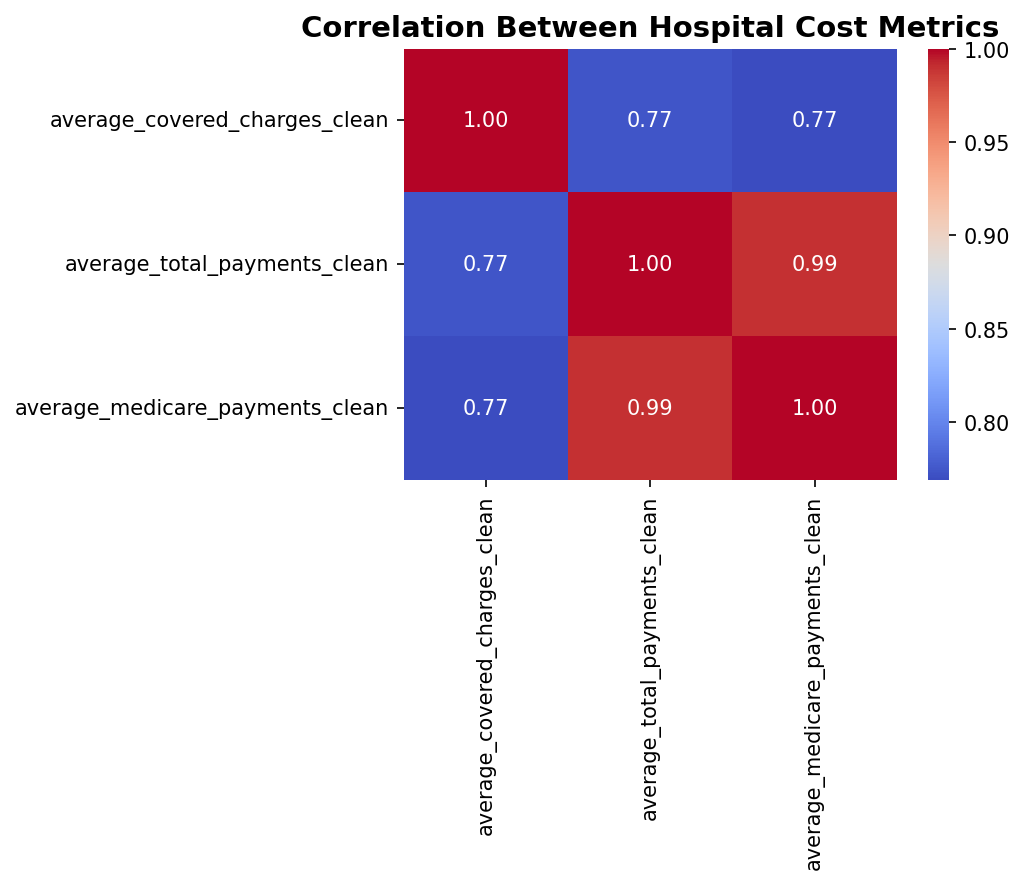

In [16]:
plt.figure(figsize=(7,6))
sns.heatmap(
    df[["average_covered_charges_clean", "average_total_payments_clean", "average_medicare_payments_clean"]]
      .corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Between Hospital Cost Metrics", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

C:\Users\hanag_wdy1xo1\AppData\Local\Temp\ipykernel_8648\1403206563.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gap_state.index, y=gap_state["avg_gap"], palette="flare")


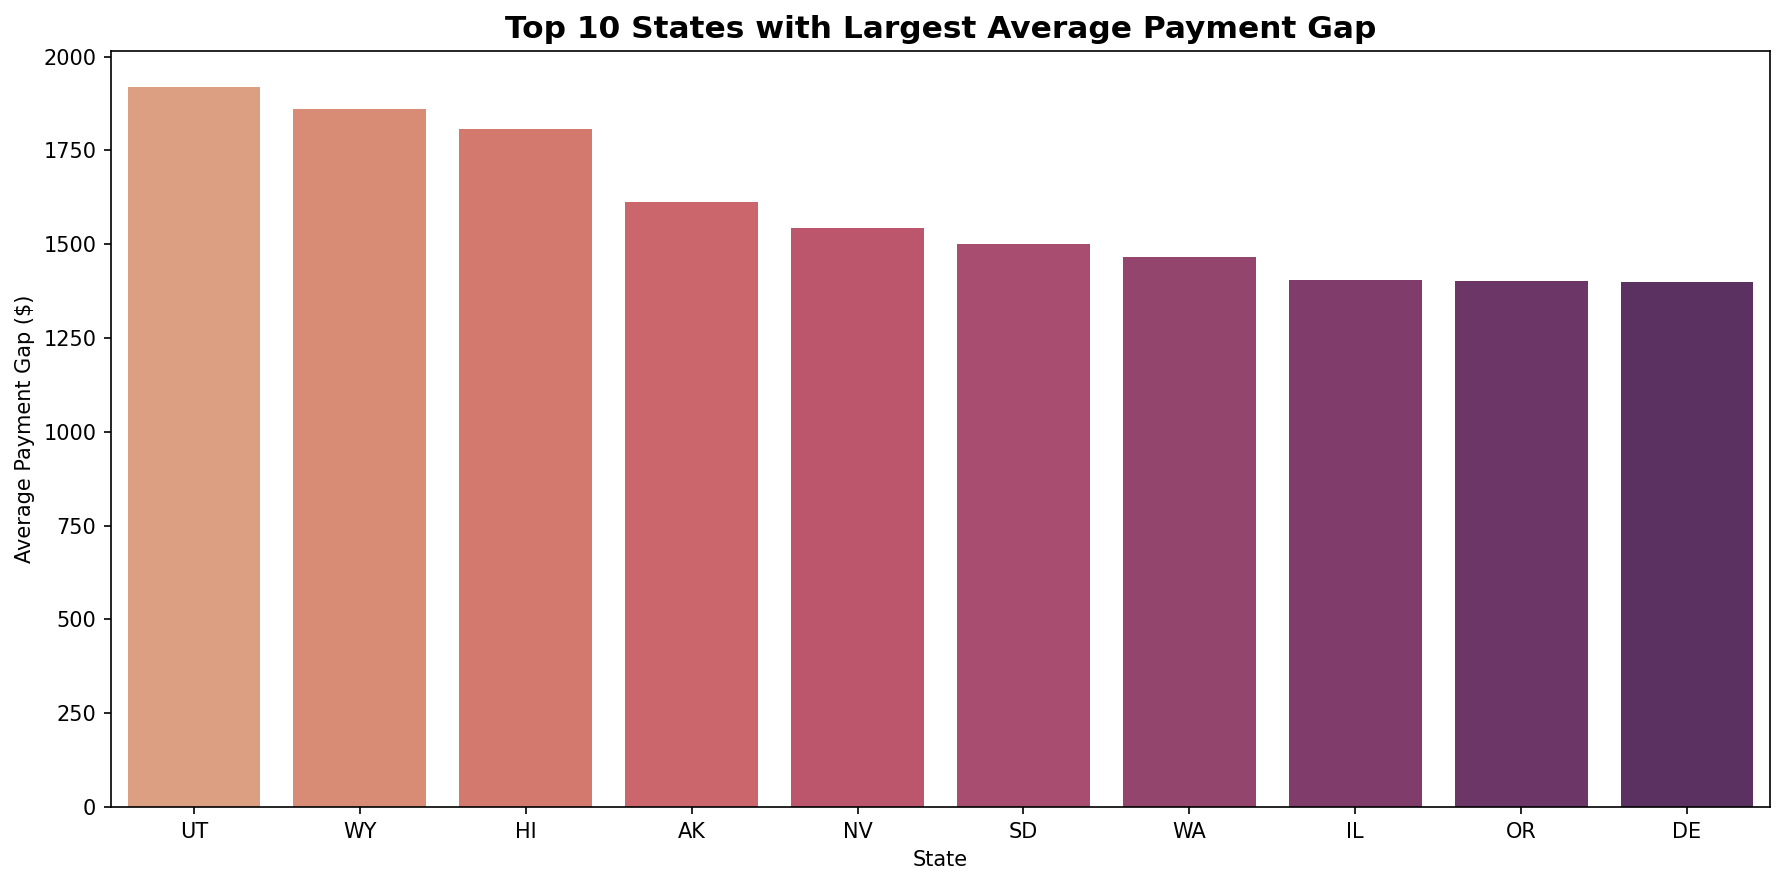

In [ ]:
gap_state = (
    df.groupby("provider_state")
      .agg(
          avg_total=("average_total_payments_clean", "mean"),
          avg_medicare=("average_medicare_payments_clean", "mean")
      )
      .assign(avg_gap=lambda x: x["avg_total"] - x["avg_medicare"])
      .sort_values("avg_gap", ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=gap_state.index, y=gap_state["avg_gap"], palette="flare")
plt.title("Top 10 States with Largest Average Payment Gap", fontsize=15, weight="bold")
plt.xlabel("State")
plt.ylabel("Average Payment Gap ($)")
plt.tight_layout()
plt.show()

C:\Users\hanag_wdy1xo1\AppData\Local\Temp\ipykernel_8648\3112806998.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hospitals.values, y=top_hospitals.index, palette="crest")


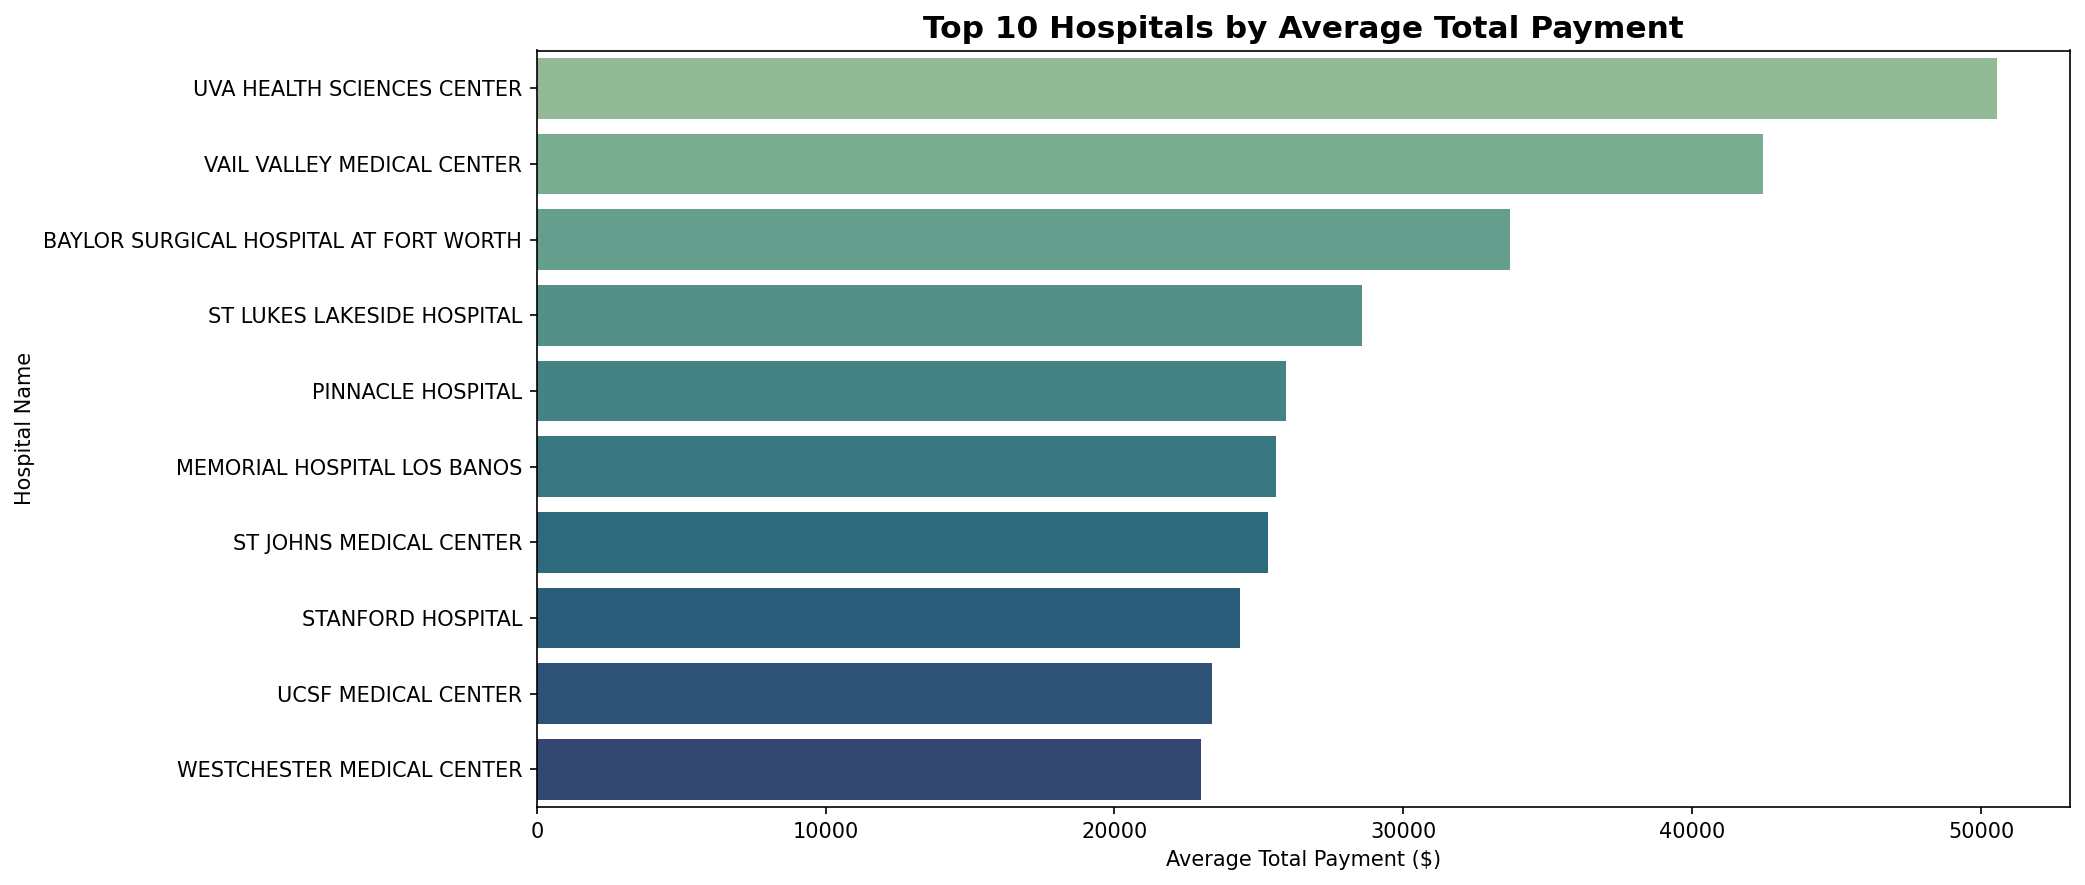

In [ ]:
top_hospitals = (
    df.groupby("provider_name")["average_total_payments_clean"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(14,6))
sns.barplot(x=top_hospitals.values, y=top_hospitals.index, palette="crest")
plt.title("Top 10 Hospitals by Average Total Payment", fontsize=15, weight="bold")
plt.xlabel("Average Total Payment ($)")
plt.ylabel("Hospital Name")
plt.tight_layout()
plt.show()

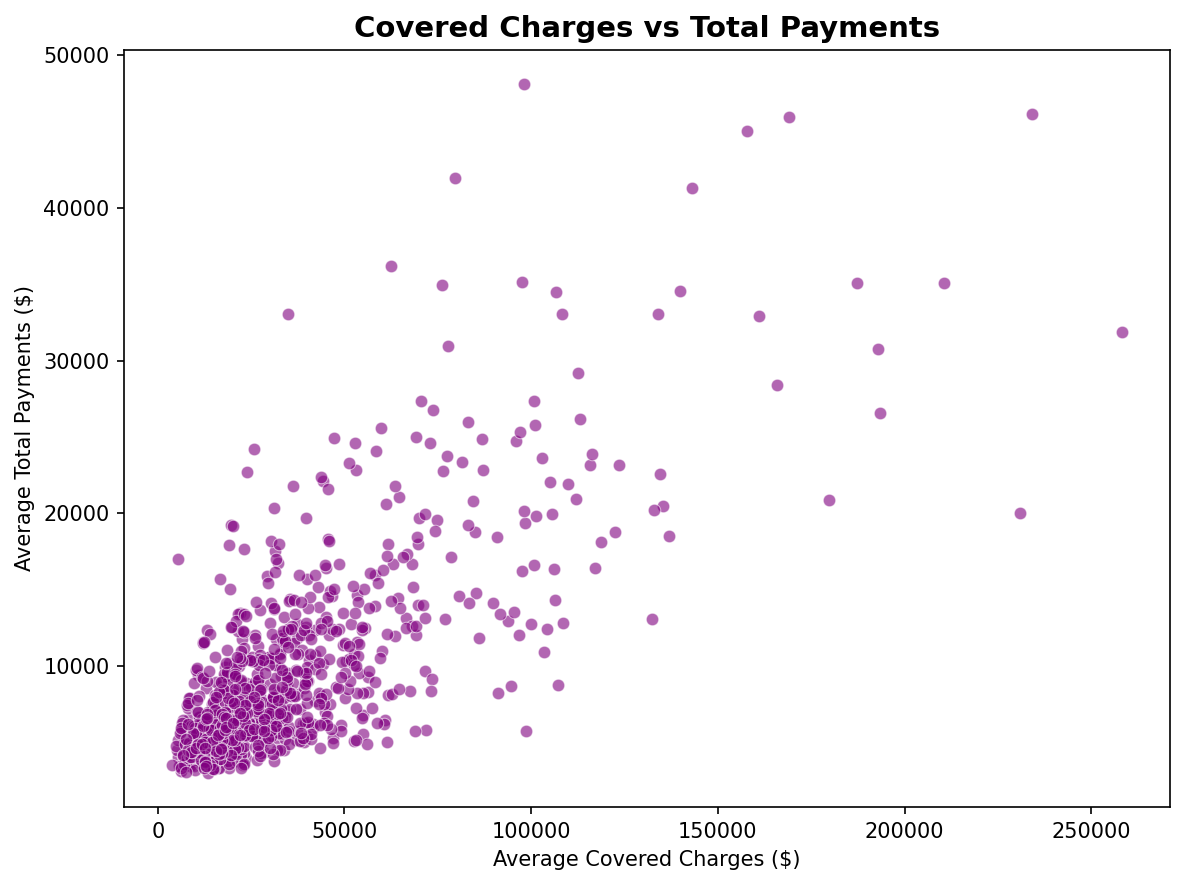

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(1000, random_state=42),  # sample for clarity
    x="average_covered_charges_clean",
    y="average_total_payments_clean",
    alpha=0.6,
    color="purple"
)
plt.title("Covered Charges vs Total Payments", fontsize=14, weight="bold")
plt.xlabel("Average Covered Charges ($)")
plt.ylabel("Average Total Payments ($)")
plt.tight_layout()
plt.show()

In [21]:
# plt.savefig("top_drg_payments.png", dpi=300, bbox_inches="tight", transparent=True)

In [14]:
plt.rcParams["figure.dpi"] = 150